In [72]:
from statsbombpy import sb
import numpy as np
import pandas as pd
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import matplotlib
from scipy.ndimage import gaussian_filter


from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


In [73]:
t=sb.matches(competition_id=43,season_id=3)

In [74]:
t=t[t['competition_stage']=='Round of 16']

In [75]:
df=sb.events(match_id=3795220)

In [76]:
df.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_offensive', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_won_advantage', 'foul_won_defensive', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_inswinging', 'pass_length',
       

In [77]:
df = df[['type','minute','second','location','player']]
df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Miscontrol', 'Pressure', 'Foul Committed', 'Foul Won',
       'Interception', 'Ball Recovery', 'Dribbled Past', 'Dribble',
       'Shield', 'Dispossessed', 'Duel', 'Block', 'Clearance', 'Shot',
       'Goal Keeper', 'Half End', 'Injury Stoppage', 'Referee Ball-Drop',
       'Substitution', 'Tactical Shift', 'Error'], dtype=object)

In [78]:
df = df[df['player']=='Pedro González López']

In [79]:
df = df[(df['type']=='Pass')|(df['type']=='Shot')|(df['type']=='Carry')|(df['type']=='Dribble')]

In [80]:
l=[]
l1=[]
for i in df['location']:
    l.append(i[0])
    l1.append(i[1])
df['x']=l
df['y']=l1
df.drop('location',axis=1,inplace=True)

In [81]:
customcmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom cmap',['black','red'])

In [82]:
robotto_regular = FontManager()
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()]

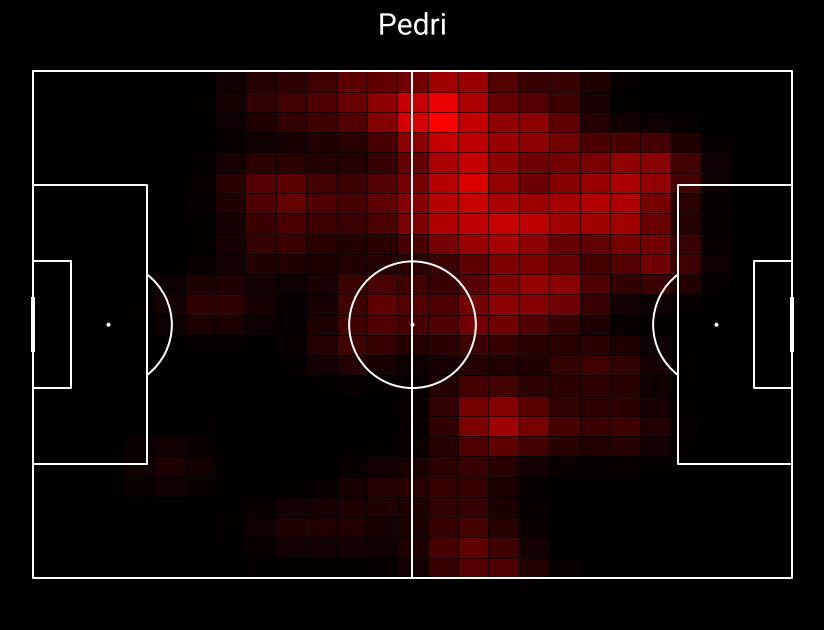

In [83]:
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      axis=False,
                      grid_height=0.86)
fig.set_facecolor('#000000')

bin_statistic = pitch.bin_statistic(df.x, df.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap=customcmap, edgecolors='#000000')

ax_title = axs['title'].text(0.5, 0.5, "Pedri", color='white',
                             va='center', ha='center', path_effects=path_eff,
                             fontproperties=robotto_regular.prop, fontsize=30)